In [1]:
from os import path
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from util.table_converter import TableConverter, TableProps;
from generator.constant import Constant
from statistics import mean, median, variance, stdev

In [2]:
target_project_names = list(map(lambda s : s.split('/')[-1].split('.')[0], glob('../compile_information/*.json')))
target_project_names.remove('template')
target_project_names.remove('compile_information')

target_project_root_paths = [Constant.local_project_root_path + '/' + tpn for tpn in target_project_names]

project_root_path = Constant.output_root_path + '/' + 'project.csv'
project_df = pd.read_csv(project_root_path)

file_root_path = Constant.output_root_path + '/' + 'file.csv'
file_df = pd.read_csv(file_root_path)

available_macro_root_path = Constant.output_root_path + '/' + 'available_macros.csv'
available_macro_df = pd.read_csv(available_macro_root_path)

used_macro_root_path = Constant.output_root_path + '/' + 'used_macros.csv'
used_macro_df = pd.read_csv(used_macro_root_path)

defined_macro_root_path = Constant.output_root_path + '/' + 'defined_macros.csv'
defined_macro_df = pd.read_csv(defined_macro_root_path)

whole_macro_root_path = Constant.output_root_path + '/' + 'whole_macros.csv'
whole_macro_df = pd.read_csv(whole_macro_root_path)

macros_root_path =Constant.output_root_path + '/' + 'macros.csv'
macros_df = pd.read_csv(macros_root_path)

tvc = TableConverter()


In [3]:
def scatter_relation_helper(df1: pd.DataFrame.dtypes, df2: pd.DataFrame.dtypes):
    macro_per_files_count_1 = df1.groupby(['file_id']).count().sort_values(['macro_id'], ascending=False)
    macro_per_files_count_2 = df2.groupby(['file_id']).count().sort_values(['macro_id'], ascending=False)

    file_macro_df_1 = pd.merge(macro_per_files_count_1, file_df, on='file_id', how='left').fillna(0)
    file_macro_df_2 = pd.merge(macro_per_files_count_2, file_df, on='file_id', how='left').fillna(0)
    del file_macro_df_1['name']
    del file_macro_df_2['name']
    del file_macro_df_1['path']
    del file_macro_df_2['path']
    del file_macro_df_1['id']
    del file_macro_df_2['id']
    file_macro_df = pd.merge(file_macro_df_1, file_macro_df_2, on='file_id', how='outer')
    data = dict()
    target_p_names = project_df[['project_id', 'name']]
    for _, dt in target_p_names.iterrows():
        if not dt['name'] in target_project_names:
            continue
        data[dt['name']] = [[], []]
        filterd_id = file_macro_df[file_macro_df['project_id_x'] == dt['project_id']]
        for f in filterd_id.iterrows():
            data[dt['name']][0].append(f[1]['macro_id_x'])
            data[dt['name']][1].append(f[1]['macro_id_y'])
    return data

def scatter_relation(df1: pd.DataFrame.dtypes, df2: pd.DataFrame.dtypes, x_label: str, y_label: str):
    data = scatter_relation_helper(df1, df2)
    _, ax = plt.subplots()
    for p_name, d in data.items():
        ax.scatter(d[0], d[1], label=p_name)
    ax.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

In [4]:
entities = [
    ('available macro', available_macro_df),
    ('whole macro', whole_macro_df),
    ('used macro', used_macro_df),
    ('define macro', defined_macro_df)
]

## Show relation between each type of macro variables

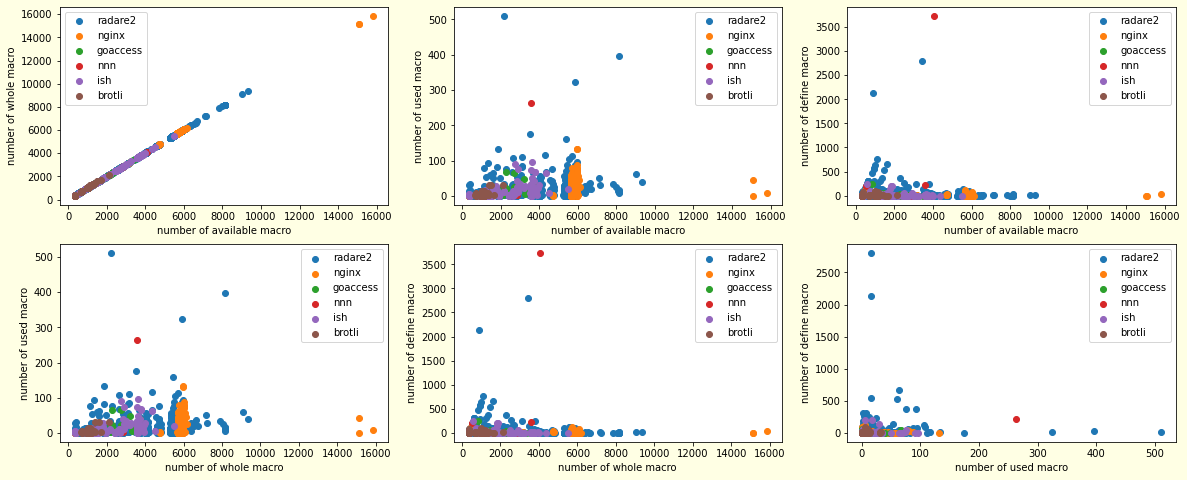

In [5]:
fig = plt.figure(figsize=[20, 8])
fig.patch.set_facecolor('xkcd:off white')

rows = 2
cols = 3
cnt = 0

for idx, (label1, data1) in enumerate(entities):
    for label2, data2 in entities[idx+1:]:
        if label1 == label2:
            continue
        ax = fig.add_subplot(rows, cols, cnt + 1)
        cnt += 1
        data = scatter_relation_helper(data1, data2)
        for p_name, d in data.items():
            ax.scatter(d[0], d[1], label=p_name)
        ax.legend()
        ax.set_xlabel('number of {}'.format(label1))
        ax.set_ylabel('number of {}'.format(label2))
plt.show()